# Torchvision Utilites for Visualization

`torchvision` provides utilites for visualizing images, bounding boxes and segmentation masks.

All the utilities do not perform inplace modification of inputs.


In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import random
import scipy.misc

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

## Visualize Grid of Images

Use `torchvision.utils.make_grid()` to create a grid of images.

You can also pad, mormalize and scale the images on the fly.

This utility can take 4D mini-batch Tensor of shape (B x C x H x W) or a list of images all of the same size.

In [8]:
from torchvision.utils import make_grid

In [9]:
lena = scipy.misc.face()
img = transforms.ToTensor()(lena)
print(img.size())

torch.Size([3, 768, 1024])
/home/oke/Aditya/PyTorch/vision/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1614931498178/work/torch/csrc/utils/tensor_numpy.cpp:179.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [10]:
imglist = [img, img, img, img.clone().fill_(-10)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


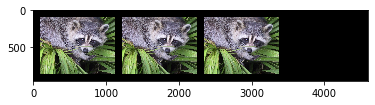

In [11]:
show(make_grid(imglist, padding=100))

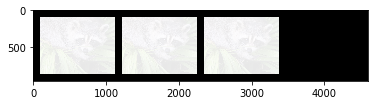

In [12]:
show(make_grid(imglist, padding=100, normalize=True))

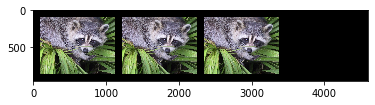

In [13]:
show(make_grid(imglist, padding=100, normalize=True, value_range=(0, 1)))

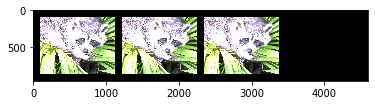

In [14]:
show(make_grid(imglist, padding=100, normalize=True, value_range=(0, 0.5)))

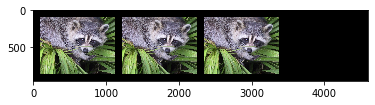

In [15]:
show(make_grid(imglist, padding=100, normalize=True, scale_each=True))

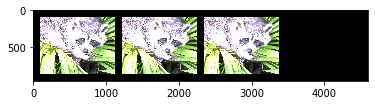

In [16]:
show(make_grid(imglist, padding=100, normalize=True, value_range=(0, 0.5), scale_each=True))

## Visualize Bounding Boxes

You can use `torchvision.utils.draw_bounding_boxes` to draw boxes on image.

You can set the colors, labels, width as well as font and font size !

Note that this util requires a single image of dtype `uint8`.


In [9]:
from torchvision.utils import draw_bounding_boxes

torch.Size([3, 768, 1024])


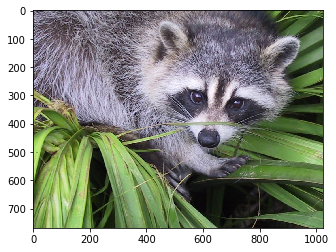

In [18]:
lena = scipy.misc.face()
img = transforms.ToTensor()(lena)
img = transforms.ConvertImageDtype(dtype=torch.uint8) (img)

print(img.size())

show(img)

We will draw a few boxes on lena!

Note that the boxes are in `(xmin, ymin, xmax, ymax)` format


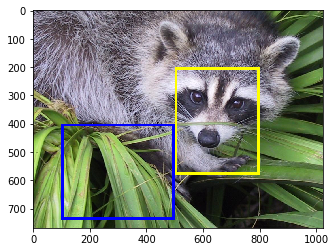

In [19]:
boxes = torch.tensor([[100, 400, 500, 740], [500, 200, 800, 580]], dtype=torch.float)
labels = ["grass", "lena"]
colors = ["blue", "yellow"]
result = draw_bounding_boxes(img, boxes, labels=labels, colors=colors, width=10)
show(result)

You can also `fill` the box with the color.

Note that after filling with color, one needs to save the resultant tensor in PNG i.e. 4 channel color format.


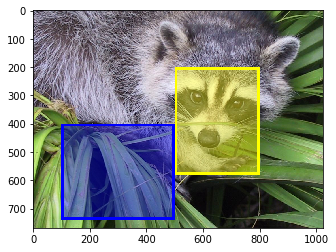

In [20]:
result = draw_bounding_boxes(img, boxes, labels=labels, colors=colors, width=10, fill=True)
show(result)

You can also plot bounding boxes produced from torchvision detection models.

Here is demo with torchvision's FasterRCNN. You can also try using RetinaNet

In [17]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

model = fasterrcnn_resnet50_fpn(pretrained=True)
model = model.eval()

Let's load an image and get predictions from model.

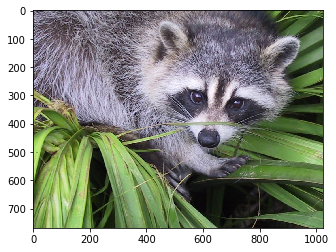

In [18]:
lena = scipy.misc.face()
img = transforms.ToTensor()(lena)
show(img)

In [19]:
# Get predictions from model
outputs = model(img.unsqueeze(0))
print(outputs)

[{'boxes': tensor([[  67.7731,   21.4386,  953.7158,  699.8793],
        [ 202.9559,    4.7902,  940.4207,  679.3505],
        [  29.5735,   21.2866,  376.5114,  424.0385],
        [   0.0000,  301.0412, 1024.0000,  768.0000],
        [  52.2440,  281.1678,  784.5737,  733.5809],
        [  57.0902,   18.2170,  954.9303,  709.1071],
        [  27.6776,  359.6552,  814.2780,  753.4029],
        [  78.1657,   32.2182,  938.7345,  703.4693],
        [  50.6699,   31.5133,  918.5210,  722.1469],
        [   0.0000,  260.4532,  729.0366,  768.0000],
        [ 480.9375,  512.6833,  784.6242,  616.1514],
        [   0.0000,  268.2257,  953.8960,  768.0000],
        [ 100.8516,  354.4102,  766.3854,  718.2952]], grad_fn=<StackBackward>), 'labels': tensor([17, 18, 20, 15, 16, 23, 51, 16, 20, 64, 16, 62, 20]), 'scores': tensor([0.3728, 0.3323, 0.3065, 0.2696, 0.2288, 0.2064, 0.1333, 0.1174, 0.1026,
        0.0963, 0.0725, 0.0574, 0.0549], grad_fn=<IndexBackward>)}]


Let's plot top 5 boxes detected by our model

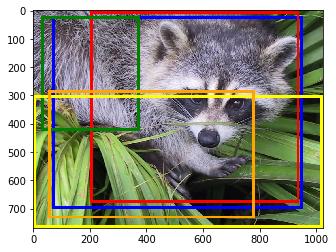

In [21]:
boxes = outputs[0]['boxes']
colors = ["blue", "red", "green", "yellow", "orange"]

# We need a uint8 image for plotting!
img = transforms.ConvertImageDtype(dtype=torch.uint8) (img)

result = draw_bounding_boxes(img, boxes=boxes[:5], colors=colors, width=10, fill=False)
show(result)

## Visualize Segmenation Masks

You can use `torchvision.utils.draw_segmentation_masks` to draw masks on image.

You can set the colors as well as transparency of masks drawn.

Note that this util requires a single RGB image of dtype `uint8`.


In [45]:
from torchvision.utils import draw_segmentation_masks
from PIL import Image
import requests

In [46]:
url = "http://images.cocodataset.org/val2017/000000281759.jpg"
img = Image.open(requests.get(url, stream=True).raw)

torch.Size([3, 427, 640])


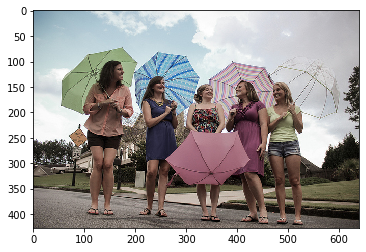

In [47]:
# lena = scipy.misc.face()
img = transforms.ToTensor()(img)

print(img.size())
show(img)

We will draw a few maks on lena!

Note that the masks contain tensors denoting probabilites of each class.

Here is demo with torchvision's FCN Resnet-50. You can also try using DeepLabv3 or lraspp mobilenet models.

In [48]:
from torchvision.models.segmentation import fcn_resnet50

model = fcn_resnet50(pretrained=True)
model = model.eval()

In [49]:
output = model(img.unsqueeze(0))
masks = output['out'].squeeze(0)

Note that this utility too needs uint8 dtype image.

You can vary alpha to get more transparent or filled masks.

In [50]:
img = transforms.ConvertImageDtype(dtype=torch.uint8) (img)

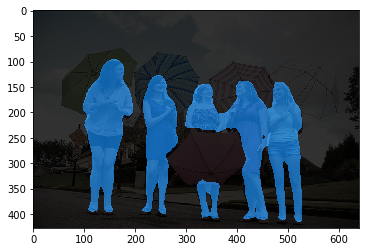

In [51]:
result = draw_segmentation_masks(img, masks, alpha=0.2)
show(result)

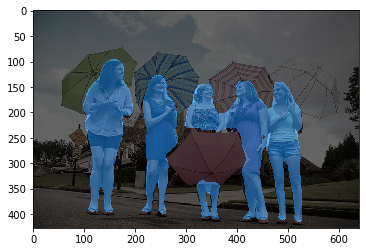

In [52]:
result = draw_segmentation_masks(img, masks, alpha=0.4)
show(result)

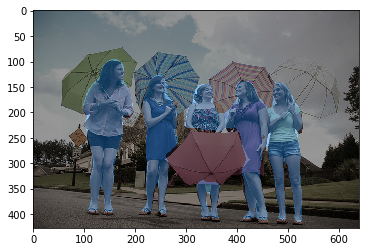

In [53]:
result = draw_segmentation_masks(img, masks, alpha=0.6)
show(result)